# Small Oscillations Double Pendulum

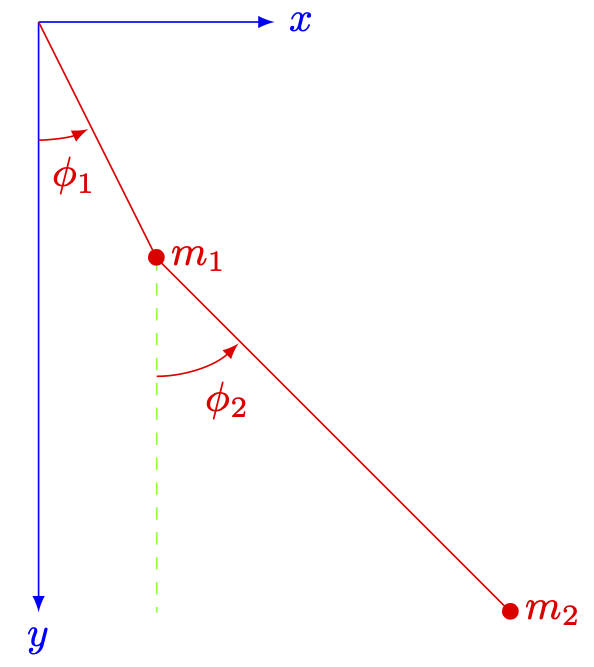

##Preamble

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import os
import subprocess
from IPython.display import Image

Symbolic variables

In [ ]:
t,l1,l2,m1,m2,g=sp.symbols('t,l1,l2,m1,m2,g',positive=True)

Generalized coordinates

In [ ]:
phi1,phi2=sp.Function('phi1')(t),sp.Function('phi2')(t)

Cartesian Coordinates

In [ ]:
x1=l1*sp.sin(phi1)
x2=l1*sp.sin(phi1)+l2*sp.sin(phi2)
y1=l1*sp.cos(phi1)
y2=l1*sp.cos(phi1)+l2*sp.cos(phi2)

Cartesian velocities

In [ ]:
dot_x1=x1.diff(t)
dot_y1=y1.diff(t)
dot_x2=x2.diff(t)
dot_y2=y2.diff(t)

## Kinetic Energy $T$

In [ ]:
T=sp.simplify(sp.Rational(1,2)*m1*(dot_x1**2+ dot_y1**2)+sp.Rational(1,2)*m2*(dot_x2**2+ dot_y2**2))
T

l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## Potential Energy $U$ (notice that $y$ increases downwards)

In [ ]:
U=(-m1*g*y1-m2*g*y2).simplify()
U

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t)))

## Lagrangian $L=T-U$

In [ ]:
Lag=(T-U).simplify()
Lag

g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) + l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## For simplicity we take $l_1=l_2=l$ in what follows.

In [ ]:
l=sp.symbols('l', positive=True)

## Inertia Tensor

This function calculates the matrix of second derivatives of a function w.r.t. a set of variables

In [ ]:
def inertia_tensor(x):
  #This function calculates the inertia tensor given the generalized coordinates collected in a Matrix
  v=x.diff(t)
  A=sp.zeros(len(v))
  for i in range(len(v)):
    for j in range(len(v)):
      A[i,j]=(T.diff(v[i])).diff(v[j])
  for k in range(len(x)):
    A=A.subs([(x[k],0)])
  return sp.simplify(A)

In [ ]:
M0=inertia_tensor(sp.Matrix([[phi1,phi2]]))
M0

Matrix([
[l1**2*(m1 + m2), l1*l2*m2],
[       l1*l2*m2, l2**2*m2]])

In [ ]:
M=M0.subs([(l1,l),(l2,l)])
M

Matrix([
[l**2*(m1 + m2), l**2*m2],
[       l**2*m2, l**2*m2]])

## Stiff Tensor

In [ ]:
def stiff_tensor(x):
  #This function calculates the stiff tensor given the generalized coordinates collected in a Matrix
  A=sp.zeros(len(x))
  for i in range(len(x)):
    for j in range(len(x)):
      A[i,j]=sp.simplify((U.diff(x[i])).diff(x[j]))
  for k in range(len(x)):
    A=A.subs([(x[k],0)])
  return sp.simplify(A)

In [ ]:
K0=stiff_tensor(sp.Matrix([[phi1,phi2]]))
K0

Matrix([
[g*l1*(m1 + m2),       0],
[             0, g*l2*m2]])

In [ ]:
K=K0.subs([(l1,l),(l2,l)])
K

Matrix([
[g*l*(m1 + m2),      0],
[            0, g*l*m2]])

In this case, the stiff tensor is already diagonal. Thus we can use it to perform the scale transformation that reshapes it into the unit matrix, and apply the same transformation to the inertia tensor.

In [ ]:
MK=sp.simplify(sp.sqrt(K)**(-1)*M*sp.sqrt(K)**(-1))
MK

Matrix([
[                         l/g, l*sqrt(m2)/(g*sqrt(m1 + m2))],
[l*sqrt(m2)/(g*sqrt(m1 + m2)),                          l/g]])

Diagonalization $T^{-1} M_K T=M_{KD}$

In [ ]:
T,MKD= MK.diagonalize()

Orthonormalization

In [ ]:
OMK=sp.simplify(T*(sp.sqrt((sp.Transpose(T)*T))**(-1)))
OMK

Matrix([
[-sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2, sqrt(2)/2]])

Verification of orthonormality and diagonalization

In [ ]:
sp.simplify(sp.Transpose(OMK)*OMK)

Matrix([
[1, 0],
[0, 1]])

In [ ]:
sp.simplify(sp.Transpose(OMK)*MK*OMK-MKD)

Matrix([
[0, 0],
[0, 0]])

Finally, the diagonal matrix of squared eigenfrequencies is the inverse of $M_{KD}$

In [ ]:
WD=(MKD)**(-1)
WD

Matrix([
[1/(-l*sqrt(m2)/(g*sqrt(m1 + m2)) + l/g),                                      0],
[                                      0, 1/(l*sqrt(m2)/(g*sqrt(m1 + m2)) + l/g)]])

Modal Matrix

In [ ]:
S=sp.simplify(sp.sqrt(K)**(-1)*OMK*sp.sqrt(MKD)**(-1))
S

Matrix([
[        -sqrt(2)/(2*l*(m1 + m2)**(1/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2))),          sqrt(2)/(2*l*(m1 + m2)**(1/4)*sqrt(sqrt(m2) + sqrt(m1 + m2)))],
[sqrt(2)*(m1 + m2)**(1/4)/(2*l*sqrt(m2)*sqrt(-sqrt(m2) + sqrt(m1 + m2))), sqrt(2)*(m1 + m2)**(1/4)/(2*l*sqrt(m2)*sqrt(sqrt(m2) + sqrt(m1 + m2)))]])

Normal Coordinates

In [ ]:
NC=(S**(-1))*sp.Matrix([[phi1],[phi2]])
NC

Matrix([
[(sqrt(2)*l*sqrt(m2)*(m1 + m2)**(1/4) - sqrt(2)*l*(m1 + m2)**(3/4))*phi1(t)/(2*sqrt(-sqrt(m2) + sqrt(m1 + m2))) + (sqrt(2)*l*sqrt(m2)*sqrt(m1 + m2) - sqrt(2)*l*m2)*phi2(t)/(2*(m1 + m2)**(1/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2)))],
[                                                                           sqrt(2)*l*sqrt(m2)*sqrt(sqrt(m2) + sqrt(m1 + m2))*phi2(t)/(2*(m1 + m2)**(1/4)) + sqrt(2)*l*(m1 + m2)**(1/4)*sqrt(sqrt(m2) + sqrt(m1 + m2))*phi1(t)/2]])

General Solution for the Angles

In [ ]:
A1,A2,B1,B2=sp.symbols('A1,A2,B1,B2')

In [ ]:
phi_sol=sp.simplify(S*sp.Matrix([[A1*sp.cos(WD[0,0]*t)+B1*sp.sin(WD[0,0]*t)],[A2*sp.cos(WD[1,1]*t)+B2*sp.sin(WD[1,1]*t)]]))
phi_sol

Matrix([
[         sqrt(2)*(sqrt(-sqrt(m2) + sqrt(m1 + m2))*(A2*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2)))) + B2*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2))))) - sqrt(sqrt(m2) + sqrt(m1 + m2))*(A1*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2)))) - B1*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2))))))/(2*l*sqrt(m1)*(m1 + m2)**(1/4))],
[sqrt(2)*(m1 + m2)**(1/4)*(sqrt(-sqrt(m2) + sqrt(m1 + m2))*(A2*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2)))) + B2*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2))))) + sqrt(sqrt(m2) + sqrt(m1 + m2))*(A1*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2)))) - B1*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2))))))/(2*l*sqrt(m1)*sqrt(m2))]])

In [ ]:
phi1_0,phi2_0,dot_phi1_0, dot_phi2_0=sp.symbols(r'\phi_1^0,\phi_2^0,\dot{\phi}_1^0, \dot{\phi}_2^0')

In [ ]:
sols_A=sp.solve([sp.Eq(phi_sol[0].subs(t,0),phi1_0),sp.Eq(phi_sol[1].subs(t,0),phi2_0)],[A1,A2])
sols_A

{A1: -sqrt(2)*\phi_1^0*l*sqrt(m1)*(m1 + m2)**(1/4)/(2*sqrt(sqrt(m2) + sqrt(m1 + m2))) + sqrt(2)*\phi_2^0*l*sqrt(m1)*sqrt(m2)/(2*(m1 + m2)**(1/4)*sqrt(sqrt(m2) + sqrt(m1 + m2))),
 A2: sqrt(2)*\phi_1^0*l*sqrt(m1)*(m1 + m2)**(1/4)/(2*sqrt(-sqrt(m2) + sqrt(m1 + m2))) + sqrt(2)*\phi_2^0*l*sqrt(m1)*sqrt(m2)/(2*(m1 + m2)**(1/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2)))}

In [ ]:
dot_phi_sol=phi_sol.diff(t)
dot_phi_sol

Matrix([
[         sqrt(2)*(sqrt(-sqrt(m2) + sqrt(m1 + m2))*(-A2*g*sqrt(m1 + m2)*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2))))/(l*(sqrt(m2) + sqrt(m1 + m2))) + B2*g*sqrt(m1 + m2)*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2))))/(l*(sqrt(m2) + sqrt(m1 + m2)))) - sqrt(sqrt(m2) + sqrt(m1 + m2))*(-A1*g*sqrt(m1 + m2)*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2))))/(l*(sqrt(m2) - sqrt(m1 + m2))) - B1*g*sqrt(m1 + m2)*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2))))/(l*(sqrt(m2) - sqrt(m1 + m2)))))/(2*l*sqrt(m1)*(m1 + m2)**(1/4))],
[sqrt(2)*(m1 + m2)**(1/4)*(sqrt(-sqrt(m2) + sqrt(m1 + m2))*(-A2*g*sqrt(m1 + m2)*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2))))/(l*(sqrt(m2) + sqrt(m1 + m2))) + B2*g*sqrt(m1 + m2)*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2))))/(l*(sqrt(m2) + sqrt(m1 + m2)))) + sqrt(sqrt(m2) + sqrt(m1 + m2))*(-A1*g*sqrt(m1 + m2)*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2))))/(l*(sqrt(m2) - sqrt(m1 + m2))) - B1*g*sqrt(m1 + m2)*cos(g*t*sqrt(m

In [ ]:
sols_B=sp.solve([sp.Eq(dot_phi_sol[0].subs(t,0),dot_phi1_0),sp.Eq(dot_phi_sol[1].subs(t,0),dot_phi2_0)],[B1,B2])
sols_B

{B1: -sqrt(2)*\dot{\phi}_1^0*l**2*m1**(3/2)*sqrt(m1 + m2)/(2*g*m1*(m1 + m2)**(1/4)*sqrt(sqrt(m2) + sqrt(m1 + m2)) + 2*g*sqrt(m2)*(m1 + m2)**(3/4)*sqrt(sqrt(m2) + sqrt(m1 + m2)) + 2*g*m2*(m1 + m2)**(1/4)*sqrt(sqrt(m2) + sqrt(m1 + m2))) + sqrt(2)*\dot{\phi}_2^0*l**2*m1**(3/2)*sqrt(m2)/(2*g*m1*(m1 + m2)**(1/4)*sqrt(sqrt(m2) + sqrt(m1 + m2)) + 2*g*sqrt(m2)*(m1 + m2)**(3/4)*sqrt(sqrt(m2) + sqrt(m1 + m2)) + 2*g*m2*(m1 + m2)**(1/4)*sqrt(sqrt(m2) + sqrt(m1 + m2))),
 B2: sqrt(2)*\dot{\phi}_1^0*l**2*m1**(3/2)*sqrt(m1 + m2)/(2*g*m1*(m1 + m2)**(1/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2)) - 2*g*sqrt(m2)*(m1 + m2)**(3/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2)) + 2*g*m2*(m1 + m2)**(1/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2))) + sqrt(2)*\dot{\phi}_2^0*l**2*m1**(3/2)*sqrt(m2)/(2*g*m1*(m1 + m2)**(1/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2)) - 2*g*sqrt(m2)*(m1 + m2)**(3/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2)) + 2*g*m2*(m1 + m2)**(1/4)*sqrt(-sqrt(m2) + sqrt(m1 + m2)))}

In [ ]:
phi_icn=phi_sol.subs([(A1,sols_A[A1]),(A2,sols_A[A2]),(B1,sols_B[B1]),(B2,sols_B[B2])]).simplify()
phi_icn

Matrix([
[((g*(\phi_1^0*sqrt(m1 + m2) - \phi_2^0*sqrt(m2))*(m1 + sqrt(m2)*sqrt(m1 + m2) + m2)*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2)))) - l*m1*(\dot{\phi}_1^0*sqrt(m1 + m2) - \dot{\phi}_2^0*sqrt(m2))*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2)))))*(m1 - sqrt(m2)*sqrt(m1 + m2) + m2) + (g*(\phi_1^0*sqrt(m1 + m2) + \phi_2^0*sqrt(m2))*(m1 - sqrt(m2)*sqrt(m1 + m2) + m2)*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2)))) + l*m1*(\dot{\phi}_1^0*sqrt(m1 + m2) + \dot{\phi}_2^0*sqrt(m2))*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) + sqrt(m1 + m2)))))*(m1 + sqrt(m2)*sqrt(m1 + m2) + m2))/(2*g*sqrt(m1 + m2)*(m1 - sqrt(m2)*sqrt(m1 + m2) + m2)*(m1 + sqrt(m2)*sqrt(m1 + m2) + m2))],
[    ((-g*(\phi_1^0*sqrt(m1 + m2) - \phi_2^0*sqrt(m2))*(m1 + sqrt(m2)*sqrt(m1 + m2) + m2)*cos(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2)))) + l*m1*(\dot{\phi}_1^0*sqrt(m1 + m2) - \dot{\phi}_2^0*sqrt(m2))*sin(g*t*sqrt(m1 + m2)/(l*(sqrt(m2) - sqrt(m1 + m2)))))*(m1 - sqrt(m2)*sqrt(m1 + m2) + m2) + (g*(\phi_1^0

## Plots and Animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import subprocess
from IPython.display import Image

sp.lambdify() is a function that converts a symbolic function into a numerical one

In [ ]:
num_phi_1=sp.lambdify([t,l,g,m1,m2,phi1_0,phi2_0,dot_phi1_0, dot_phi2_0],phi_icn[0])
num_phi_2=sp.lambdify([t,l,g,m1,m2,phi1_0,phi2_0,dot_phi1_0, dot_phi2_0],phi_icn[1])

Time frame for the display of the solution

In [ ]:
t0, tmax, dt= 0.0, 30.0, 0.01 # Initial time, final time, time step (s)
time=np.arange(t0,tmax+dt,dt)

Setting parameters and initial conditions

In [ ]:
l_num = 1 # length in m
g_num = 9.8 # m/s^2
m1_num= 1.0 #Kg
m2_num= 0.1 #Kg
phi1_0_num = 0.15 # rad
phi2_0_num = 0.0 # rad
dot_phi1_0_num = 0.0 # rad/s
dot_phi2_0_num = 0.0 # rad/s

In [ ]:
phi1_data=num_phi_1(time,l_num,g_num,m1_num,m2_num,phi1_0_num,phi2_0_num,dot_phi1_0_num, dot_phi2_0_num)
phi2_data=num_phi_2(time,l_num,g_num,m1_num,m2_num,phi1_0_num,phi2_0_num,dot_phi1_0_num, dot_phi2_0_num)

Plotting the angles as functions of time

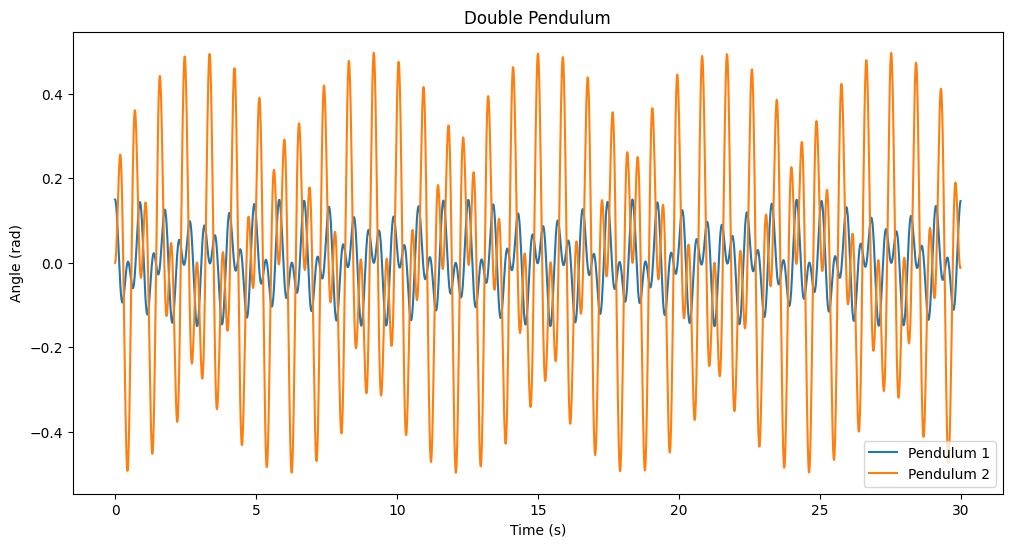

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(time,phi1_data, label='Pendulum 1')
plt.plot(time,phi2_data, label='Pendulum 2')
plt.title('Double Pendulum')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.show()

Conversion to cartesian coordinates (here $y$ increases upwards)

In [ ]:
x1_data=l_num*np.sin(phi1_data)
y1_data=-l_num*np.cos(phi1_data)
x2_data=x1_data+l_num*np.sin(phi2_data)
y2_data=y1_data-l_num*np.cos(phi2_data)

Animation parameters

In [ ]:
r=0.02 # Bob circle radius
trail_secs=1 # Trail of the bobs position for the last trail_secs seconds
max_trail=int(trail_secs/dt) # max_trail time points

Animation frames

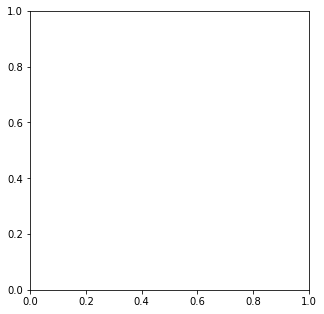

In [ ]:
def make_plot(i):
  # Plot and save an image of the double pendulum configuration for time point i
  # Pendulum rods
  ax.plot([0,x1_data[i],x2_data[i]],[0,y1_data[i],y2_data[i]],lw=2,c='k')
  # Circles representing the anchor point and the bobs
  c0=Circle((0,0), r/2, fc='k')
  c1=Circle((x1_data[i],y1_data[i]), r, fc='b', ec='b')
  c2=Circle((x2_data[i],y2_data[i]), r, fc='r', ec='r')
  ax.add_patch(c0)
  ax.add_patch(c1)
  ax.add_patch(c2)
  # The trail is divided into ns segments and plotted as a fading line
  ns=20
  s=max_trail//ns
  for j in range(ns):
    imin=i-(ns-j)*s
    if imin<0:
      continue
    imax=imin+s+1
    # fading
    alpha=(j/ns)**2
    ax.plot(x1_data[imin:imax],y1_data[imin:imax],c='b',solid_capstyle='butt',lw=2,alpha=alpha)
    ax.plot(x2_data[imin:imax],y2_data[imin:imax],c='r',solid_capstyle='butt',lw=2,alpha=alpha)
  # Set the limits of the plots
  ax.set_xlim(-l_num/2,l_num/2)
  ax.set_ylim(-2*l_num-2*r,2*r)
  ax.set_aspect('equal',adjustable='box')
  plt.xlabel('x[m]')
  plt.ylabel('y[m]')
  plt.savefig('_img{:04d}.png'.format(i//di), dpi=72)
  plt.cla()


#Make an image every di time points, corresponding to a grame rate of fps frames per second
fps=10
di=int(1/fps/dt)
fig=plt.figure(figsize=(5,9), dpi=72)
ax=fig.add_subplot(111)

for i in range(0,time.size,di):
  make_plot(i)

Finally we will bind all the frames into a .gif using imagemagick

In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
i="*.png"
o="animation.gif"
subprocess.call("convert -delay 10 -loop 0 " + i + " " + o, shell=True)

0

In [ ]:
fname='animation.gif'
Image(open(fname,'rb').read())

Output hidden; open in https://colab.research.google.com to view.

This is the result of the animation

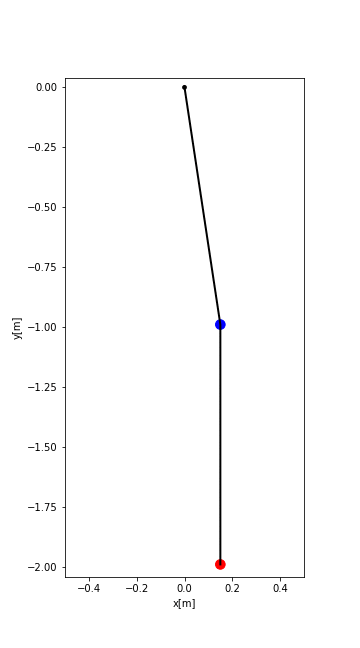